# Test

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
import nibabel as nib
from scipy import signal
t1_img = nib.load('mni_icbm152_nlin_asym_09a_nifti/mni_icbm152_nlin_asym_09a/mni_icbm152_t1_tal_nlin_asym_09a.nii')
t1_data = t1_img.get_fdata()

# Fourier Transform in Numpy

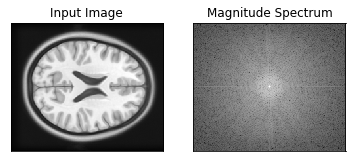

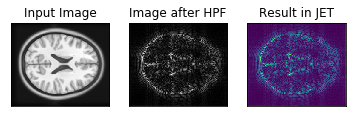

In [2]:

img = t1_data[:, :, 94]
#img = cv2.imread('messi5.jpg',0)
f = np.fft.fft2(img)
fshift = np.fft.fftshift(f)
magnitude_spectrum = 20*np.log(np.abs(fshift))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = np.round(rows/2) , np.round(cols/2)

fshift[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 0
f_ishift = np.fft.ifftshift(fshift)
img_back = np.fft.ifft2(f_ishift)
img_back = np.abs(img_back)

plt.subplot(131),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(132),plt.imshow(img_back, cmap = 'gray')
plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
plt.subplot(133),plt.imshow(img_back)
plt.title('Result in JET'), plt.xticks([]), plt.yticks([])

plt.show()

# Fourier Transform in OpenCV

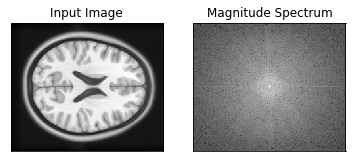

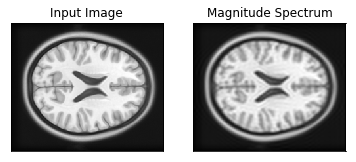

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = t1_data[:, :, 94]

dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
dft_shift = np.fft.fftshift(dft)

magnitude_spectrum = 20*np.log(cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

rows, cols = img.shape
crow,ccol = rows/2 , cols/2

# create a mask first, center square is 1, remaining all zeros
mask = np.zeros((rows,cols,2),np.uint8)
mask[int(crow)-30:int(crow)+30, int(ccol)-30:int(ccol)+30] = 1

# apply mask and inverse DFT
fshift = dft_shift*mask
f_ishift = np.fft.ifftshift(fshift)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

plt.subplot(121),plt.imshow(img, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

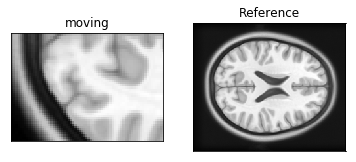

In [4]:
#Step 1: Read Image
import ImageRegistration as ir
rect_moving = [100,150,20,90]
moving = np.copy(t1_data[rect_moving[0]:rect_moving[1], rect_moving[2]:rect_moving[3], 94])

reference = np.copy(t1_data[:, :, 94])
r_spacing = np.array([1,1])
r_origin = np.array([-reference.shape[0]/2,-reference.shape[1]/2])
mi_org = ir.Image(reference, r_spacing, r_origin)

theta_opt = 0
a_opt = np.cos(theta_opt)
b_opt = -np.sin(theta_opt)
tx_opt = 0
d_opt = np.sin(theta_opt)
e_opt = np.cos(theta_opt)
ty_opt = 0
T_opt = np.array([[a_opt, b_opt, tx_opt],[d_opt, e_opt, ty_opt],[0,0,1]], dtype=float)

r_org = ir.Transform(mi_org, ir.Image(np.zeros(reference.shape), r_spacing, r_origin), T_opt, False)
peppers=r_org.Values
plt.subplot(121),plt.imshow(moving, cmap = 'gray')
plt.title('moving'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(reference, cmap = 'gray')
plt.title('Reference'), plt.xticks([]), plt.yticks([])
plt.show()

# Preprocessing Resampling etc


26915


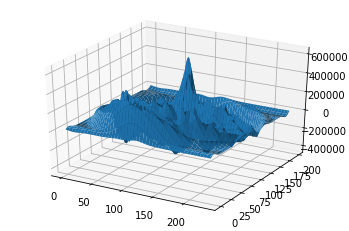

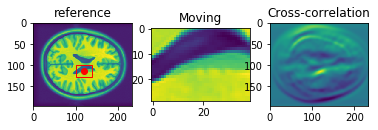

In [237]:
import matplotlib.patches as patches

from mpl_toolkits.mplot3d import Axes3D
moving -= moving.mean()
reference -= reference.mean()
corr = signal.correlate2d(reference, moving, boundary='symm', mode='same')

fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X = np.arange(0, corr.shape[1], 1)
Y = np.arange(0, corr.shape[0], 1)
X, Y = np.meshgrid(X, Y)
surf = ax.plot_surface(X, Y, corr)

y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
print(np.argmax(corr))

xbox = rect_moving[3] - rect_moving[2]
ybox = rect_moving[1] - rect_moving[0]

xCorner = x-xbox/2
yCorner = y-ybox/2
import matplotlib.pyplot as plt
fig = plt.figure()

#img=fig.subplots(1)
img=fig.add_subplot(1,3,1)
img.set_title('reference')
img.plot(x, y, 'ro')

rect = patches.Rectangle((xCorner, yCorner), xbox,ybox,linewidth=1,edgecolor='r',facecolor='none')
img.add_patch(rect)
imgplot=plt.imshow(reference)

img=fig.add_subplot(1,3,2)
img.set_title('Moving')
imgplot=plt.imshow(moving)

img=fig.add_subplot(1,3,3)
img.set_title('Cross-correlation')
imgplot=plt.imshow(corr)

# NCC prototype

In [429]:
if False:
    reference = np.array([[1,3,3,1,5],
                          [1,7,8,9,5],
                          [-11,12,0,5,15],
                          [1,10,-8,-5,15],
                          [0,2,-5,-7,10]], dtype =float)
    rect_moving = [1,4,1,4]
    moving = np.copy(reference[rect_moving[0]:rect_moving[1], rect_moving[2]:rect_moving[3]])
else:
    rect_moving = [101,130,101,140]
    moving = np.copy(t1_data[rect_moving[0]:rect_moving[1], rect_moving[2]:rect_moving[3], 94])
    reference = np.copy(t1_data[:, :, 94])
    
reference = reference-np.mean(reference)
moving = moving-np.mean(moving)
# Pad
padWidthX = int((moving.shape[1]-1)/2)
padWidthY = int((moving.shape[0]-1)/2)

gPad = np.pad(array=reference, pad_width=padWidth,mode="constant")
gPad = np.pad(reference, [(padWidthY, ), (padWidthX, )], mode='constant')
corr = np.full(reference.shape,fill_value=np.inf, dtype=float)
fV2 = np.sum(moving**2)
fV = np.sum(moving)
n = moving.size
for i in range(reference.shape[1]):
    for j in range(reference.shape[0]):        
        xMax = i+moving.shape[1]
        yMax = j+moving.shape[0]        
        gT = gPad[j:yMax,i:xMax]        
        assert moving.shape == gT.shape
        u = np.sum(moving * gT)    
        d = np.sqrt(np.sum(gT**2)*fV2)        
        corr[j,i] = u/d
print("done")
y, x = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
print(x)
print(y)

The history saving thread hit an unexpected error (OperationalError('disk I/O error',)).History will not be written to the database.
done
120
115


# In fourier domain

In [431]:
assert np.abs(np.mean(reference)) < 1e-10
assert np.abs(np.mean(moving)) < 1e-10

padWidthX = int((moving.shape[1]-1)/2)
padWidthY = int((moving.shape[0]-1)/2)
gPad = np.pad(reference, [(padWidthY, ), (padWidthX, )], mode='constant')
G = np.fft.fft2(gPad)
F = np.fft.fft2(moving, G.shape)
fpad = np.pad(moving, [(0, reference.shape[0] - moving.shape[0]), (0, reference.shape[1] - moving.shape[1])], mode='constant')
FG = np.conjugate(F)*G
ncc = np.real(np.fft.ifft2(FG))


# Plot result

From time domain: x:120, y115
From fourier domain: x:120, y115


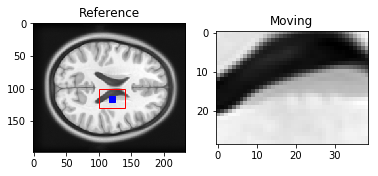

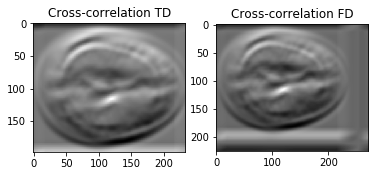

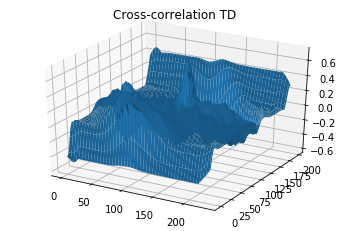

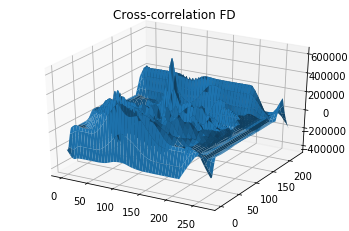

In [432]:
y1, x1 = np.unravel_index(np.argmax(corr), corr.shape)  # find the match
y2, x2 = np.unravel_index(np.argmax(ncc), ncc.shape)  # find the match
print("From time domain: x:{0}, y{1}".format(x1,y1))
print("From fourier domain: x:{0}, y{1}".format(x2,y2))
xbox = rect_moving[3] - rect_moving[2]
ybox = rect_moving[1] - rect_moving[0]

xCorner = x1-xbox/2
yCorner = y1-ybox/2

import matplotlib.pyplot as plt

fig = plt.figure()

img=fig.add_subplot(1,2,1)
img.set_title('Reference')
img.plot(x1, y1, 'ro')
img.plot(x2, y2, 'bs')

rect = patches.Rectangle((xCorner,yCorner), xbox,ybox,linewidth=1,edgecolor='r',facecolor='none')
img.add_patch(rect)
imgplot=plt.imshow(reference,cmap='gray')

img=fig.add_subplot(1,2,2)
img.set_title('Moving')
imgplot=plt.imshow(moving,cmap='gray')

fig = plt.figure()
img=fig.add_subplot(1,2,1)
img.set_title('Cross-correlation TD')
imgplot=plt.imshow(corr,cmap='gray')

img=fig.add_subplot(1,2,2)
img.set_title('Cross-correlation FD')
imgplot=plt.imshow(ncc,cmap='gray')

fig = plt.figure()
img=fig.gca(projection='3d')
# Plot the surface.
img.set_title('Cross-correlation TD')
X = np.arange(0, corr.shape[1], 1)
Y = np.arange(0, corr.shape[0], 1)
X, Y = np.meshgrid(X, Y)
surf = img.plot_surface(X, Y, corr)

fig = plt.figure()
img=fig.gca(projection='3d')
# Plot the surface.
img.set_title('Cross-correlation FD')
X = np.arange(0, ncc.shape[1], 1)
Y = np.arange(0, ncc.shape[0], 1)
X, Y = np.meshgrid(X, Y)
surf = img.plot_surface(X, Y, ncc)


# Multiple moving images

[[57, 48], [174, 48], [57, 147], [174, 147]]


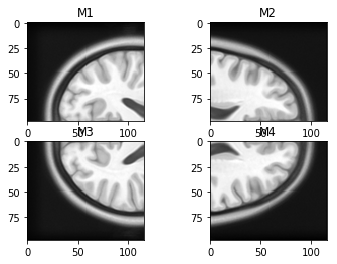

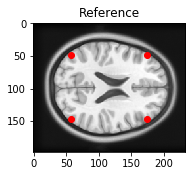

In [428]:
reference = np.copy(t1_data[:, :, 94])
# four images
n_img = 4
entireImage = np.copy(t1_data[:,:, 94])
xSize = int(entireImage.shape[1] / 2)
ySize = int(entireImage.shape[0] / 2)

rect_moving = [0,int((reference.shape[0] + 1)/ 2),0,int((reference.shape[1] +1) / 2)]
movingImages = []


movingImages = [entireImage[0:ySize, 0:xSize], entireImage[0:ySize, -xSize:],
                entireImage[-ySize:, 0:xSize],entireImage[-ySize:,-xSize:]]

movingImages -= np.mean(movingImages)
fig = plt.figure()
for i in range(n_img):
    img=fig.add_subplot(n_img/2,n_img/2,i+1)
    img.set_title('M{0}'.format(i+1))
    imgplot=plt.imshow(movingImages[i],cmap='gray')

result = []
#moving = movingImages[0]
for moving in movingImages:
    padWidthX = int((moving.shape[1]-1)/2)
    padWidthY = int((moving.shape[0]-1)/2)
    gPad = np.pad(reference, [(padWidthY, ), (padWidthX, )], mode='constant')
    G = np.fft.fft2(gPad)
    F = np.fft.fft2(moving, G.shape)    
    FG = np.conjugate(F)*G
    ncc = np.real(np.fft.ifft2(FG))
    y, x = np.unravel_index(np.argmax(ncc), ncc.shape)  # find the match    
    result.append([x,y])    
print(result)
fig = plt.figure()

img=fig.add_subplot(1,2,1)
img.set_title('Reference')
for i in result:
    img.plot(i[0], i[1], 'ro')
imgplot=plt.imshow(reference,cmap='gray')

# Spline

(197, 233)
(197, 233)


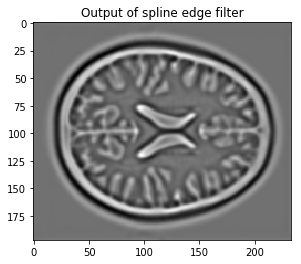

In [433]:
derfilt = np.array([1.0, -2, 1.0], dtype=np.float32)
ck = signal.cspline2d(reference, 8.0)
print(ck.shape)
print(reference.shape)
deriv = (signal.sepfir2d(ck, derfilt, [1]) + signal.sepfir2d(ck, [1], derfilt))
plt.figure()
plt.imshow(deriv)
plt.gray()
plt.title('Output of spline edge filter')
plt.show()